In [1]:
#constants that get changed when notebook is autorun
SCOUT_FOLDER_PATH = r'C:\Users\kowaleskim\Workspace\measure_the_future\mtf_data\DB1 - Entry'

In [2]:
import matplotlib.pyplot as plt
import matplotlib.colors as mpcolors
from matplotlib.patches import Rectangle
import numpy as np

import load_mtf_data
import os

import random

from constants import NUM_PATHS_TO_DISPLAY, DATE_RANGE, MTF_DETECTION_PADDING
(l, t, r, b) = MTF_DETECTION_PADDING

In [3]:
#set matplotlib to display plots in notbook output rather than new window
%matplotlib inline

In [4]:
#use load_mtf_data python script to get data from the most recent date range subfolder
#(interactions, im, subfolder_name) = load_mtf_data.from_most_recent_subfolder(SCOUT_FOLDER_PATH)
(interactions, im) = load_mtf_data.from_date_range(SCOUT_FOLDER_PATH, DATE_RANGE)

Problem loading interaction data in C:\Users\kowaleskim\Workspace\measure_the_future\mtf_data\DB1 - Entry\db1_10192017
Expecting value: line 332952 column 3 (char 2899968)
Problem loading calibration image in C:\Users\kowaleskim\Workspace\measure_the_future\mtf_data\DB1 - Entry\db1_10252017
'NoneType' object has no attribute 'read'
Problem loading interaction data in C:\Users\kowaleskim\Workspace\measure_the_future\mtf_data\DB1 - Entry\old visualizations

Problem loading calibration image in C:\Users\kowaleskim\Workspace\measure_the_future\mtf_data\DB1 - Entry\old visualizations
'NoneType' object has no attribute 'read'


None (1280, 720) L


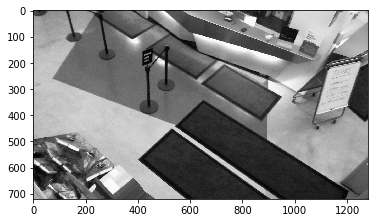

In [5]:
print(im.format, im.size, im.mode)
plt.imshow(im, cmap="gray")

In [6]:
interactions[0]

{'Duration': 3.8232381,
 'EnteredAt': datetime.datetime(2017, 11, 16, 11, 15, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 'Id': 91841,
 'Processed': True,
 'ScoutUUID': '0bfaddf8-419b-4ab1-b08d-923463118f75',
 'WaypointTimes': [9.167e-06,
  0.3114275,
  0.9481498,
  1.5767965,
  1.8968612,
  2.8593817,
  3.1794744,
  3.5007665,
  3.8232381],
 'WaypointWidths': [[105, 70],
  [101, 130],
  [101, 200],
  [102, 202],
  [101, 215],
  [105, 215],
  [77, 197],
  [66, 183],
  [43, 136]],
 'Waypoints': [[624, 648],
  [558, 589],
  [410, 509],
  [305, 380],
  [234, 334],
  [106, 217],
  [78, 205],
  [67, 184],
  [44, 190]]}

We will be plotting interactions by the x,y coordinates of their waypoints.  Matplotlib likes to have coordinates in separate lists for x and y, instead of a single list of x, y tuples.  Thus we will add a new key to each interaction, called "Waypoints-MPL-Format" which stores waypoint coordinates in such a manner.

In [7]:
for i in interactions: 
    i['Waypoints-MPL-Format'] = list(zip(*i['Waypoints']))
    
#zip(*[(1, 4), (2, 5), (3, 6)]) -> ([1, 2, 3], [4, 5, 6])

In [8]:
interactions[0]

{'Duration': 3.8232381,
 'EnteredAt': datetime.datetime(2017, 11, 16, 11, 15, tzinfo=<DstTzInfo 'US/Eastern' EST-1 day, 19:00:00 STD>),
 'Id': 91841,
 'Processed': True,
 'ScoutUUID': '0bfaddf8-419b-4ab1-b08d-923463118f75',
 'WaypointTimes': [9.167e-06,
  0.3114275,
  0.9481498,
  1.5767965,
  1.8968612,
  2.8593817,
  3.1794744,
  3.5007665,
  3.8232381],
 'WaypointWidths': [[105, 70],
  [101, 130],
  [101, 200],
  [102, 202],
  [101, 215],
  [105, 215],
  [77, 197],
  [66, 183],
  [43, 136]],
 'Waypoints': [[624, 648],
  [558, 589],
  [410, 509],
  [305, 380],
  [234, 334],
  [106, 217],
  [78, 205],
  [67, 184],
  [44, 190]],
 'Waypoints-MPL-Format': [(624, 558, 410, 305, 234, 106, 78, 67, 44),
  (648, 589, 509, 380, 334, 217, 205, 184, 190)]}

Next, choose an arbitrary subset of interactions to display.  This is just to get a sense of where the paths are--we don't need to display *everything* as that would get too muddled.

In [9]:
interactions_to_show = random.sample(interactions, NUM_PATHS_TO_DISPLAY)

We want to color the path of each interaction based on the total duration of the interaction.  We will set a color gradient, cmap, and use norm to assign each color on the gradient to a duration such that the highest color matches with the longest duration of all the paths we are displaying.

In [10]:
cmap = plt.cm.rainbow
norm = mpcolors.Normalize(vmin=0, vmax=max(i['Duration'] for i in interactions_to_show))

In [11]:
title = "\n".join([
    str(NUM_PATHS_TO_DISPLAY) + " Randomly Selected Paths",
    "(colored based on interaction time in seconds)",
    "scout: " + os.path.basename(SCOUT_FOLDER_PATH),
    "date range: " + DATE_RANGE[0].strftime('%x') + " to " + DATE_RANGE[1].strftime("%x")
])

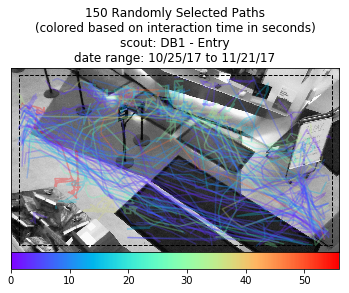

In [12]:
#get axes object on which to plot
ax = plt.axes()

#display the calibration image as background
ax.imshow(im, cmap="gray")

for i in interactions_to_show:
        
    ax.plot(i['Waypoints-MPL-Format'][0],    #x coords
            i['Waypoints-MPL-Format'][1],    #y coords
            alpha=.3,                        #make line somewhat transparent so as not to obscure the background image
            color=cmap(norm(i['Duration']))) #color line based on its duration, using the color map and norm we defined.

ax.add_patch(
    Rectangle(
        (l, t),
        im.width-l-r, im.height-t-b,
        alpha=1, 
        fill=None,
        linestyle='dashed',
        linewidth=1
    )
)
    
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

#make a colorbar of the color scale used:
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
plt.colorbar(sm, 
             ax=ax, #put it on the axes object ax
             orientation="horizontal", 
             pad=0, 
             shrink=.98
)

ax.set_title(title)

plt.savefig(SCOUT_FOLDER_PATH + os.sep + "paths_" + str(DATE_RANGE[0]) + "_" + str(DATE_RANGE[1]) + ".jpg",
           bbox_inches='tight', dpi=300)